In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('MNFCTRSMSA.csv',index_col=0,parse_dates=True) # Monthly
df.head(10)

,MNFCTRSMSA
DATE,
1992-01-01,227721
1992-02-01,228860
1992-03-01,238604
1992-04-01,239877
1992-05-01,243732
1992-06-01,245693
1992-07-01,245608
1992-08-01,242874
1992-09-01,244894


In [16]:
df.shape

(376, 1)

In [17]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', name='DATE', length=376, freq=None)

In [18]:
df.index.freq = 'MS'

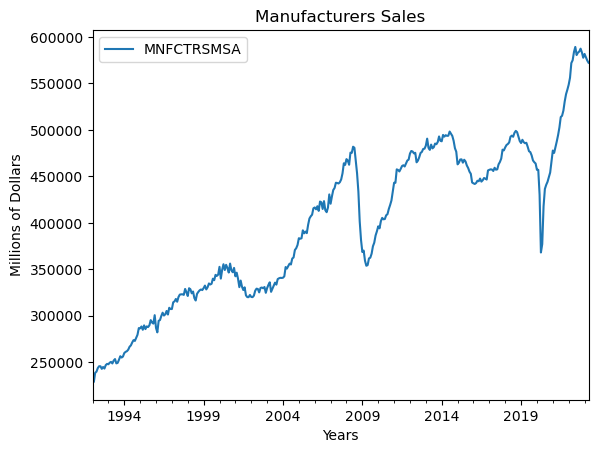

In [19]:
df.plot()
plt.title('Manufacturers Sales')
plt.xlabel('Years')
plt.ylabel('Millions of Dollars')
plt.show()

In [96]:
rolling_3mo = df['MNFCTRSMSA'].rolling(window=3,center=True)
rolling_12mo = df['MNFCTRSMSA'].rolling(window=12,center=True)
mov_avg_3 = rolling_3mo.mean()
mov_avg_12 = rolling_12mo.mean()

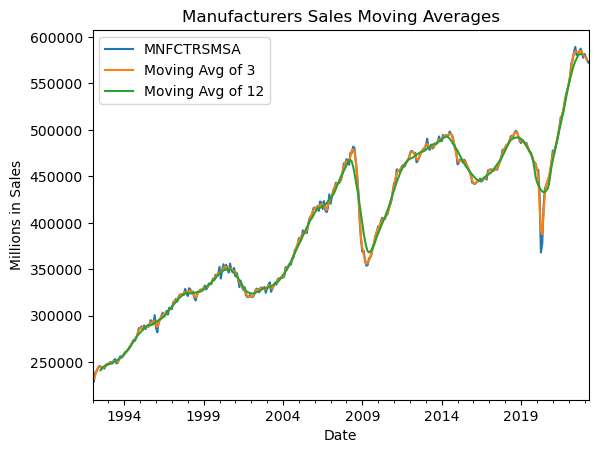

In [97]:
df.plot(label='Original Data')
mov_avg_3.plot(label='Moving Avg of 3')
mov_avg_12.plot(label='Moving Avg of 12')
plt.title('Manufacturers Sales Moving Averages')
plt.xlabel('Date')
plt.ylabel('Millions in Sales')
plt.legend()
plt.show()

In [32]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
y.index = pd.PeriodIndex(y.index,freq='M')

In [33]:
y = df['MNFCTRSMSA']
train_size = int(len(y)*0.70)
y_train = y[0:train_size]
y_test = y[train_size:]

In [34]:
test_horizon = ForecastingHorizon(y_test.index,is_relative=False)
test_horizon

ForecastingHorizon(['2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05',
             '2014-06', '2014-07', '2014-08', '2014-09',
             ...
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
             '2023-01', '2023-02', '2023-03', '2023-04'],
            dtype='period[M]', name='DATE', length=113, is_relative=False)

In [35]:
train_horizon = ForecastingHorizon(y_train.index,is_relative=False)
train_horizon

ForecastingHorizon(['1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
             '1992-07', '1992-08', '1992-09', '1992-10',
             ...
             '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07',
             '2013-08', '2013-09', '2013-10', '2013-11'],
            dtype='period[M]', name='DATE', length=263, is_relative=False)

In [36]:
# Forcasting 
model12_momean = NaiveForecaster(strategy='mean',window_length=12) # 12 periods 
fit_12mo = model12_momean.fit(y_train)
fcast_12_mo_mean = fit_12mo.predict(test_horizon)

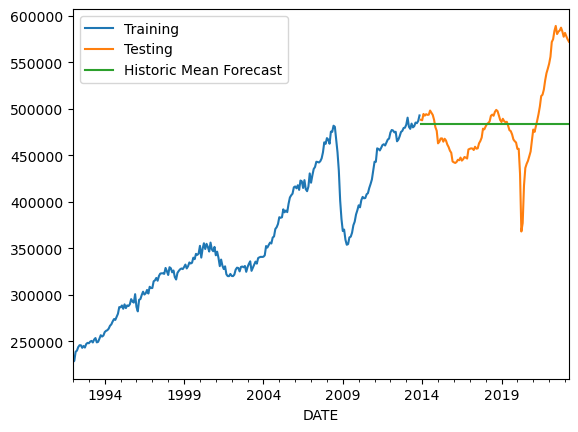

In [38]:
y_train.plot(label='Training')
y_test.plot(label='Testing')
fcast_12_mo_mean.plot(label='Historic Mean Forecast')
plt.legend()
plt.show()

In [40]:
model_last = NaiveForecaster(strategy='last',window_length=24) # 12 periods 
fit_last24mo = model_last.fit(y_train)
fcast_last24mo = fit_last24mo.predict(test_horizon)

In [43]:
model_last_naive = NaiveForecaster()  
fit_lastnaive = model_last_naive.fit(y_train)
fcast_naive = fit_lastnaive.predict(test_horizon)

In [48]:
model_naive = NaiveForecaster(strategy='mean',sp=12)
fit_naive = model_naive.fit(y_train)
fcast_last_12 = fit_naive.predict(test_horizon)

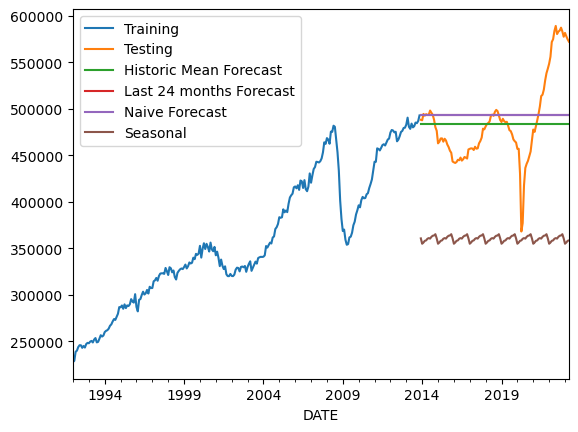

In [49]:
y_train.plot(label='Training')
y_test.plot(label='Testing')
fcast_12_mo_mean.plot(label='Historic Mean Forecast')
fcast_last24mo.plot(label="Last 24 months Forecast")
fcast_naive.plot(label='Naive Forecast')
fcast_last_12.plot(label='Seasonal')
plt.legend()
plt.show()

In [50]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import DecomposeResult

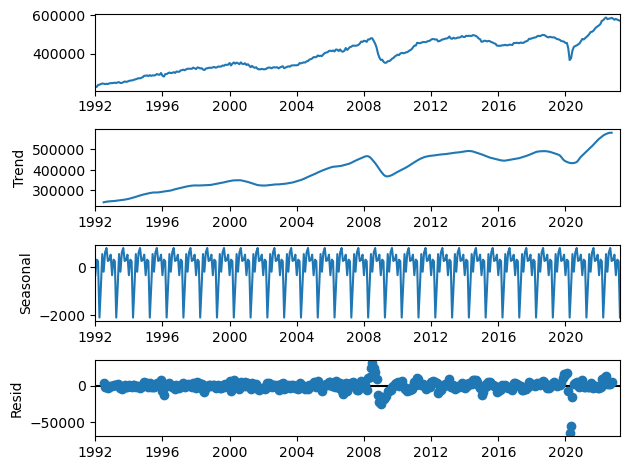

In [53]:
decomposition = sm.tsa.seasonal_decompose(df,model='additive')
fig = decomposition.plot()

In [55]:
df['Observed'] = decomposition.observed # additive 
df['Trend'] = decomposition.trend # short coming of classical decomposition 
df['Seasonal'] = decomposition.seasonal
df['Resid'] = decomposition.resid
df

,MNFCTRSMSA,Observed,Trend,Seasonal,Resid
DATE,,,,,
1992-01-01,227721,227721.0,NaN,-340.145385,NaN
1992-02-01,228860,228860.0,NaN,299.650448,NaN
1992-03-01,238604,238604.0,NaN,235.831004,NaN
1992-04-01,239877,239877.0,NaN,-2085.880108,NaN
1992-05-01,243732,243732.0,NaN,-861.084274,NaN
...,...,...,...,...,...
2022-12-01,577621,577621.0,NaN,504.274059,NaN
2023-01-01,581720,581720.0,NaN,-340.145385,NaN
2023-02-01,578124,578124.0,NaN,299.650448,NaN


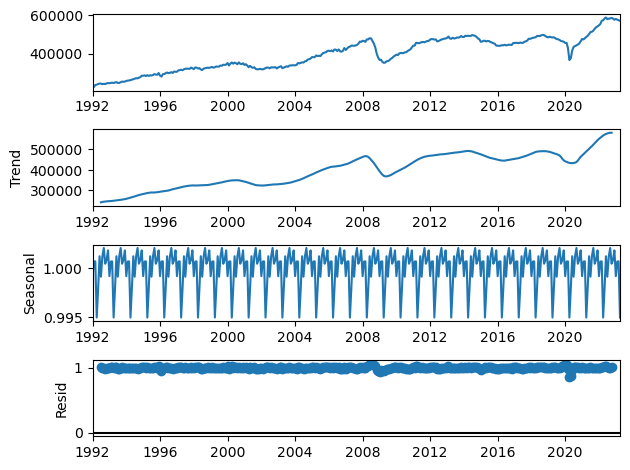

In [57]:
df1 = pd.read_csv('MNFCTRSMSA.csv',index_col=0,parse_dates=True)
decomposition = sm.tsa.seasonal_decompose(df1,model='multiplicative')
fig = decomposition.plot()

In [66]:
df1['Observed'] = decomposition.observed # multiplicative
df1['Trend'] = decomposition.trend # short coming of classical decomposition 
df1['Seasonal'] = decomposition.seasonal
df1['Resid'] = decomposition.resid
df1

,MNFCTRSMSA,Observed,Trend,Seasonal,Resid
DATE,,,,,
1992-01-01,227721,227721.0,NaN,0.999181,NaN
1992-02-01,228860,228860.0,NaN,1.000660,NaN
1992-03-01,238604,238604.0,NaN,1.000687,NaN
1992-04-01,239877,239877.0,NaN,0.994976,NaN
1992-05-01,243732,243732.0,NaN,0.997858,NaN
...,...,...,...,...,...
2022-12-01,577621,577621.0,NaN,1.001796,NaN
2023-01-01,581720,581720.0,NaN,0.999181,NaN
2023-02-01,578124,578124.0,NaN,1.000660,NaN


In [59]:
# STL Decomposition 
# Handles seasonal type
# user control rate of change
# its robost 

In [60]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
df3 = pd.read_csv('MNFCTRSMSA.csv',parse_dates=True,index_col=0)

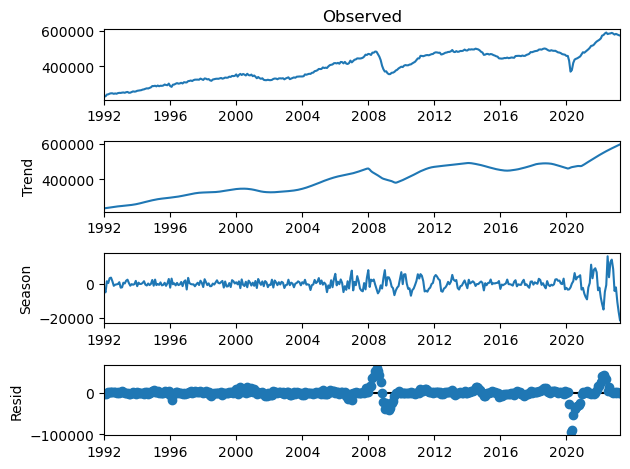

In [65]:
df3.index.freq = 'MS'
model = STL(df3,robust=True)
fit = model.fit()
fit.plot()
plt.show()

In [67]:
df3['Observed'] = fit.observed
df3['Trend'] = fit.trend 
df3['Seasonal'] = fit.seasonal
df3['Resid'] = fit.resid
df3

,MNFCTRSMSA,Observed,Trend,Seasonal,Resid
DATE,,,,,
1992-01-01,227721,227721,235078.944776,-3661.808707,-3696.136069
1992-02-01,228860,228860,236257.611819,-5108.799830,-2288.811989
1992-03-01,238604,238604,237417.598626,1373.113970,-186.712596
1992-04-01,239877,239877,238560.606873,326.275187,990.117940
1992-05-01,243732,243732,239688.926361,3154.586529,888.487111
...,...,...,...,...,...
2022-12-01,577621,577621,580580.459753,-4289.461233,1330.001480
2023-01-01,581720,581720,584324.043488,-2213.189342,-390.854147
2023-02-01,578124,578124,588028.967682,-10680.712160,775.744478


In [68]:
# Holt Winter
# Holt's method
# simple exponential smoothing by allowing forecast to have a trend
# instead of having a straight line at the end, try to capture the trend of the data
# create representation of trend
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [70]:
df4 = pd.read_csv('MNFCTRSMSA.csv',index_col=0,parse_dates=True)
df4

,MNFCTRSMSA
DATE,
1992-01-01,227721
1992-02-01,228860
1992-03-01,238604
1992-04-01,239877
1992-05-01,243732
...,...
2022-12-01,577621
2023-01-01,581720
2023-02-01,578124


In [72]:
df4.index.freq = 'MS'

In [80]:
model = ExponentialSmoothing(df4,trend='multiplicative',seasonal='additive',initialization_method='estimated')
fit = model.fit()
fcast = fit.forecast(12)
fit.summary()

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,MNFCTRSMSA,No. Observations:,376
Model:,ExponentialSmoothing,SSE,18295981544.824
Optimized:,True,AIC,6687.335
Trend:,Multiplicative,BIC,6750.208
Seasonal:,Additive,AICC,6689.251
Seasonal Periods:,12,Date:,"Wed, 12 Jul 2023"
Box-Cox:,False,Time:,12:44:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9596429,alpha,True
smoothing_trend,0.2056378,beta,True


In [89]:
model2 = ExponentialSmoothing(df4,trend='additive',seasonal='additive',initialization_method='estimated')
fit2 = model2.fit()
fcast2 = fit2.forecast(12)
fit2.summary()

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,MNFCTRSMSA,No. Observations:,376
Model:,ExponentialSmoothing,SSE,18598681919.152
Optimized:,True,AIC,6693.505
Trend:,Additive,BIC,6756.378
Seasonal:,Additive,AICC,6695.421
Seasonal Periods:,12,Date:,"Wed, 12 Jul 2023"
Box-Cox:,False,Time:,13:08:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0001,beta,True


In [90]:
model3 = ExponentialSmoothing(df4,trend='additive',seasonal='multiplicative',initialization_method='estimated')
fit3 = model3.fit()
fcast3 = fit3.forecast(12)
fit3.summary()

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,MNFCTRSMSA,No. Observations:,376
Model:,ExponentialSmoothing,SSE,18908891024.013
Optimized:,True,AIC,6699.724
Trend:,Additive,BIC,6762.598
Seasonal:,Multiplicative,AICC,6701.640
Seasonal Periods:,12,Date:,"Wed, 12 Jul 2023"
Box-Cox:,False,Time:,13:08:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9596429,alpha,True
smoothing_trend,0.0001,beta,True


In [91]:
model4 = ExponentialSmoothing(df4,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
fit4 = model4.fit()
fcast4 = fit4.forecast(12)
fit4.summary()

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,MNFCTRSMSA,No. Observations:,376
Model:,ExponentialSmoothing,SSE,18605540905.617
Optimized:,True,AIC,6693.643
Trend:,Multiplicative,BIC,6756.517
Seasonal:,Multiplicative,AICC,6695.559
Seasonal Periods:,12,Date:,"Wed, 12 Jul 2023"
Box-Cox:,False,Time:,13:08:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9596429,alpha,True
smoothing_trend,0.1713648,beta,True


In [83]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [86]:
model1 = ETSModel(df4['MNFCTRSMSA'],error='additive',initialization_method='estimated',seasonal='multiplicative')
fit1 = model1.fit()
fcast1 = fit1.forecast(12)
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:             MNFCTRSMSA   No. Observations:                  376
Model:                       ETS(ANM)   Log Likelihood               -3856.775
Date:                Wed, 12 Jul 2023   AIC                           7745.551
Time:                        12:47:01   BIC                           7808.424
Sample:                    01-01-1992   HQIC                          7770.509
                         - 04-01-2023   Scale                     47530655.344
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.049     20.380      0.000       0.904       1.096
smoothing_seasonal   2.948e-05        nan        nan        nan         nan         nan
initial_level        2.425e+05        nan        nan        nan         nan         nan
initial_seasonal.0      1.0010        nan        nan        nan         nan         nan
initial_seasonal.1      1.0014        nan        nan        nan         nan         nan
initial_seasonal.2      1.0014        nan        nan        nan         nan         nan
initial_seasonal.3      1.0026        nan        nan        nan         nan         nan
initial_seasonal.4      1.0025        nan        nan        nan         nan         nan
initial_seasonal.5      1.0007        nan        nan        nan         nan         nan
initial_seasonal.6      1.0025        nan        nan        nan         nan         nan
initial_seasonal.7      0.9993        nan        nan        nan         nan         nan
initial_seasonal.8      0.9959        nan        nan        nan         nan         nan
initial_seasonal.9      1.0013        nan        nan        nan         nan         nan
initial_seasonal.10     1.0014        nan        nan        nan         nan         nan
initial_seasonal.11     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       75.96   Jarque-Bera (JB):              6495.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.31   Skew:                            -1.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

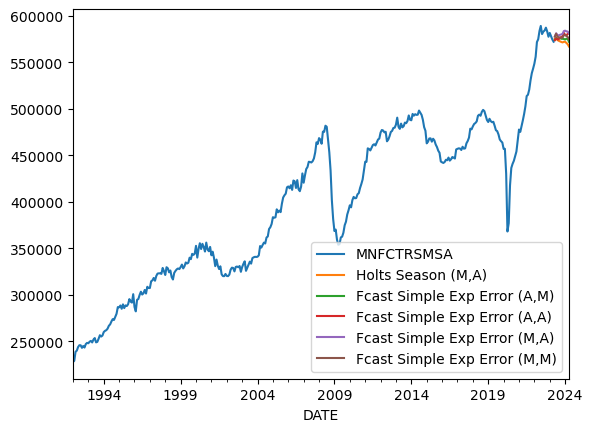

In [93]:
df4.plot(label='Orginal data')
fcast.plot(label='Holts Season (M,A)')
fcast1.plot(label='Fcast Simple Exp Error (A,M)')
fcast2.plot(label='Fcast Simple Exp Error (A,A)')
fcast3.plot(label='Fcast Simple Exp Error (M,A)')
fcast4.plot(label='Fcast Simple Exp Error (M,M)')
plt.legend()
plt.show()